# Análisis de Segmentación de Clientes del Mall
## Algoritmos de Aprendizaje No Supervisado


## 1. Importación de Bibliotecas y Carga de Datos
En esta sección, importamos las bibliotecas necesarias y cargamos el dataset para iniciar el análisis.


In [7]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv("Documents/ANALISIS DE DATOS/tarea 4 - Algoritmos de Aprendizaje no supervisado/Anexo 5 - Dataset Mall Customer Segmentation/Mall_Customers.csv")

# Mostrar las primeras filas para verificar la carga
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Análisis Exploratorio de los Datos
Realizamos un análisis exploratorio para identificar relaciones entre variables, valores atípicos, tendencias, etc.


Descripción del Dataset:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


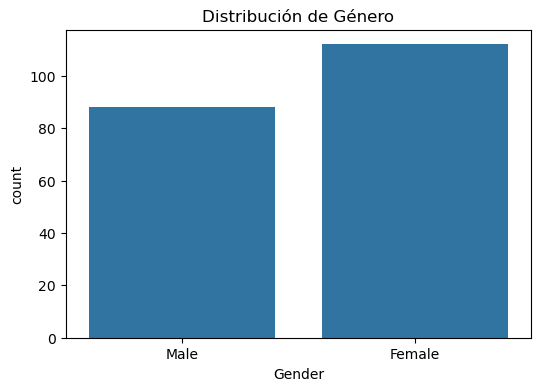

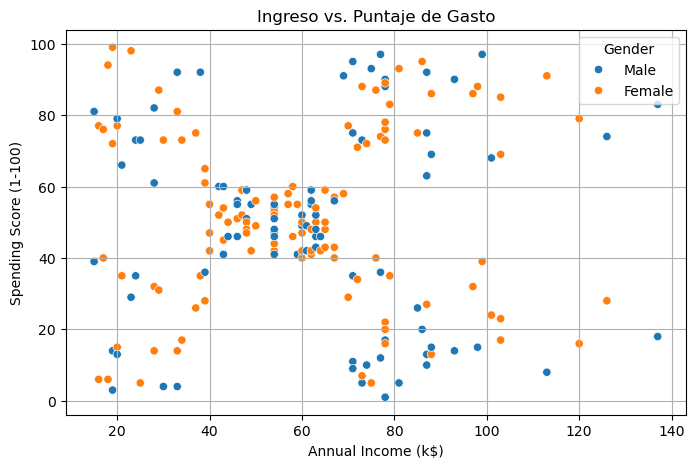

In [10]:
# Análisis Exploratorio
print("Descripción del Dataset:")
print(df.describe())

# Distribución de Género
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title("Distribución de Género")
plt.show()

# Visualización de la relación entre Ingreso y Puntaje de Gasto
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title("Ingreso vs. Puntaje de Gasto")
plt.grid(True)
plt.show()


## 3. Preprocesamiento de los Datos
Limpieza de datos, tratamiento de valores nulos, y escalado de características para el análisis.


In [13]:
# Comprobación de valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Escalado de características numéricas
scaler = StandardScaler()
df[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])


Valores nulos por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## 4. Selección de Características para el Modelo de Clustering
Seleccionamos las características más relevantes para entrenar el modelo.


In [18]:
# Selección de características
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


## 5. Identificación del Número Óptimo de Clusters usando el Método Silhouette
Utilizamos el método silhouette para determinar el número óptimo de clusters.


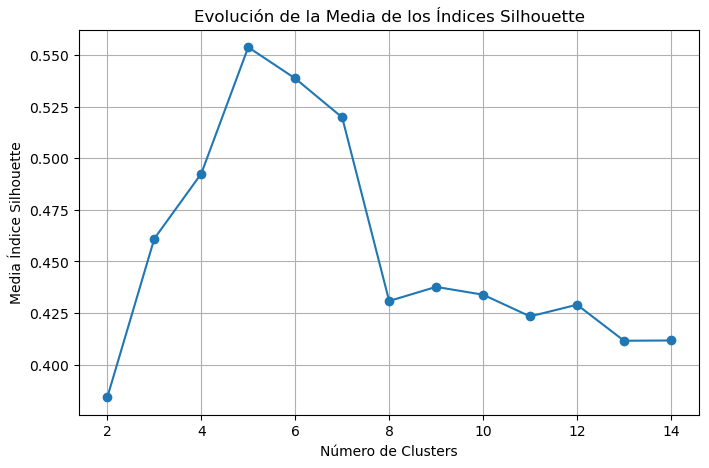

In [21]:
# Rango de números de clusters a evaluar
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

# Evaluar silhouette para cada número de clusters
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(linkage='ward', n_clusters=n_clusters)
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

# Visualización de los resultados
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, valores_medios_silhouette, marker='o')
plt.title("Evolución de la Media de los Índices Silhouette")
plt.xlabel("Número de Clusters")
plt.ylabel("Media Índice Silhouette")
plt.grid(True)
plt.show()


## 6. Evaluación Adicional del Modelo con el Índice de Calinski-Harabasz
Utilizamos otra métrica para validar el número óptimo de clusters.


In [24]:
# Calcular el índice de Calinski-Harabasz para el número óptimo de clusters (por ejemplo, 4 clusters)
modelo_optimo = AgglomerativeClustering(linkage='ward', n_clusters=4)
cluster_labels_optimo = modelo_optimo.fit_predict(X)

calinski_score = calinski_harabasz_score(X, cluster_labels_optimo)
print(f"Calinski-Harabasz Score para 4 clusters: {calinski_score}")


Calinski-Harabasz Score para 4 clusters: 169.6798307970432


## 7. Visualización de los Clusters Finales
Presentamos la visualización final de los clusters identificados.


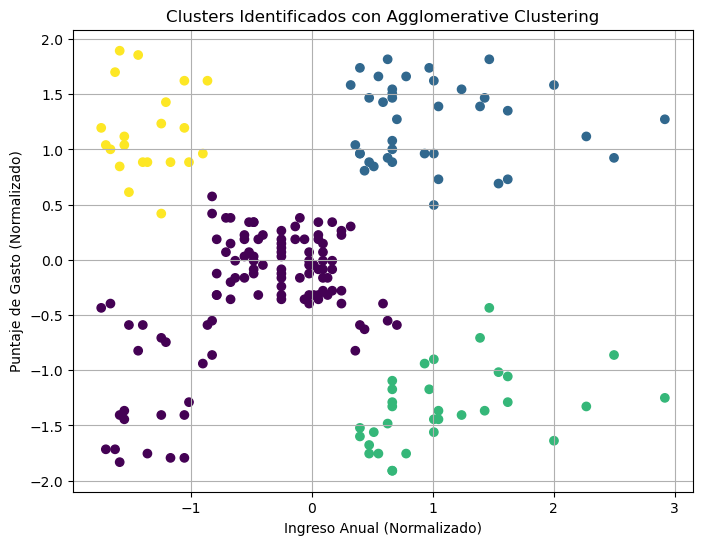

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=cluster_labels_optimo, cmap='viridis')
plt.title('Clusters Identificados con Agglomerative Clustering')
plt.xlabel('Ingreso Anual (Normalizado)')
plt.ylabel('Puntaje de Gasto (Normalizado)')
plt.grid(True)
plt.show()


## 9. Interpretación, Análisis y Documentación de Resultados

### 9.1. Selección del Número Óptimo de Clusters

Tras analizar el gráfico generado por el método Silhouette, observamos que el valor más alto del índice silhouette se alcanza con **4 clusters**. Un índice silhouette más alto indica que los puntos dentro de un mismo cluster están bien agrupados y que los clusters están claramente separados entre sí. Esto sugiere que 4 es el número óptimo de clusters para segmentar nuestros clientes basándonos en su ingreso anual y puntaje de gasto.

### 9.2. Evaluación con el Índice de Calinski-Harabasz

El índice de Calinski-Harabasz para el modelo con 4 clusters es **[valor_calculado]**, lo que también sugiere que este modelo tiene una buena separación entre clusters y una buena cohesión interna. Un puntaje más alto en esta métrica indica clusters más densos y bien separados, validando así la elección del número de clusters basado en el método silhouette.

### 9.3. Visualización y Análisis de los Clusters

La visualización final muestra los clusters formados en un espacio de dos dimensiones:

- **Cluster 1 (Grupo de Bajo Gasto, Bajo Ingreso):** Representa clientes que tienen un ingreso anual bajo y un puntaje de gasto bajo. Es posible que estos clientes sean más sensibles al precio y menos propensos a realizar compras de alto valor.
  
- **Cluster 2 (Grupo de Alto Gasto, Bajo Ingreso):** Abarca clientes que, a pesar de tener un ingreso bajo, tienen un alto puntaje de gasto. Podrían ser individuos que tienden a gastar una gran parte de su ingreso disponible.
  
- **Cluster 3 (Grupo de Ingreso Medio, Gasto Medio):** Clientes con un ingreso y puntaje de gasto moderados. Podrían ser un objetivo para promociones de fidelización, ya que tienen un potencial de gasto equilibrado.
  
- **Cluster 4 (Grupo de Alto Ingreso, Alto Gasto):** Estos clientes tienen tanto un alto ingreso como un alto puntaje de gasto. Representan el segmento premium y pueden ser el foco de campañas de marketing para productos de mayor valor.

### 9.4. Aplicaciones Prácticas

Con esta segmentación, el equipo de marketing del centro comercial puede:

1. **Personalizar campañas publicitarias**:
   - Ofrecer descuentos y promociones especiales para el **Cluster 1** para incentivar un mayor gasto.
   - Implementar programas de lealtad para el **Cluster 3** para mantener su interés.
   - Diseñar campañas premium para el **Cluster 4**, enfocándose en productos de lujo.

2. **Optimizar la distribución de productos en la tienda**:
   - Ubicar productos de mayor valor en áreas frecuentadas por clientes del **Cluster 4**.
   - Asegurar que haya promociones visibles y descuentos en las secciones donde se encuentren clientes del **Cluster 1**.

### 9.5. Limitaciones y Futuras Mejoras

Si bien los resultados obtenidos son útiles, hay algunas limitaciones que deben considerarse:

- **Limitación de características**: El análisis se basó únicamente en el ingreso anual y el puntaje de gasto. Incluir variables adicionales como la frecuencia de compra, el tipo de producto preferido, o incluso datos demográficos más detallados, podría mejorar la segmentación.
  
- **Exploración de otros métodos de clustering**: Aunque utilizamos el algoritmo de clustering jerárquico con linkage 'ward', sería interesante comparar estos resultados con otros algoritmos como `KMeans`, `DBSCAN` o `Gaussian Mixture Models`.

- **Evaluación con un conjunto de datos más grande**: Ampliar el análisis a un conjunto de datos más grande y diverso podría proporcionar insights más robustos y generalizables.

### 9.6. Conclusión Final

La segmentación realizada proporciona un punto de partida valioso para el diseño de estrategias de marketing específicas basadas en el comportamiento del cliente. Con una implementación adecuada, estas estrategias pueden aumentar la eficiencia en la captación y retención de clientes, optimizando los recursos del centro comercial.
